In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 548 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
apple = yf.Ticker('AAPL')

apple.actions

hist=apple.history(period="1y")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-22 00:00:00-05:00,160.747046,164.743854,160.070977,160.090866,117467900,0.0,0
2021-11-23 00:00:00-05:00,160.190287,160.866371,158.142177,160.478622,96041900,0.0,0
2021-11-24 00:00:00-05:00,159.822418,161.204397,158.718823,161.005554,69463600,0.0,0
2021-11-26 00:00:00-05:00,158.649250,159.524162,155.457766,155.905167,76959800,0.0,0
2021-11-29 00:00:00-05:00,158.450363,160.259868,157.873708,159.315353,88748200,0.0,0


In [4]:
hist[["Close","Volume"]]

,Close,Volume
Date,,
2021-11-22 00:00:00-05:00,160.090866,117467900
2021-11-23 00:00:00-05:00,160.478622,96041900
2021-11-24 00:00:00-05:00,161.005554,69463600
2021-11-26 00:00:00-05:00,155.905167,76959800
2021-11-29 00:00:00-05:00,159.315353,88748200
...,...,...
2022-11-15 00:00:00-05:00,150.039993,89868300
2022-11-16 00:00:00-05:00,148.789993,64218300
2022-11-17 00:00:00-05:00,150.720001,80389400


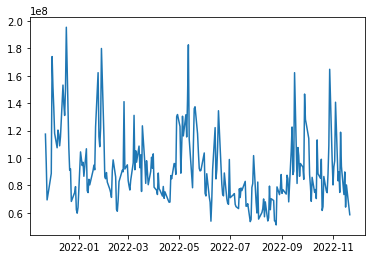

In [49]:
import matplotlib.pyplot as plt
plt.plot(hist[["Volume"]].iloc[:, 0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d4b721ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d4b622990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d4b721990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d4b616490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d4b6169d0>],
 'means': []}

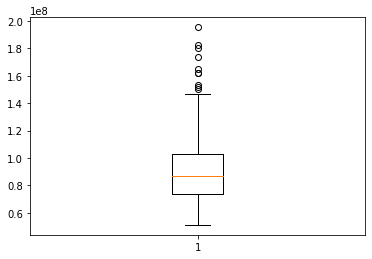

In [50]:
plt.boxplot(data=hist,x="Volume")

In [51]:
amt = hist[["Volume"]].iloc[:, 0]
amt.describe().astype('int')


count          252
mean      91457504
std       25857028
min       51218200
25%       73976925
50%       86648150
75%      103216575
max      195432700
Name: Volume, dtype: int64

In [52]:
import pandas as pd
import numpy as np

k = []
df = []
k_max = []

V0=hist["Volume"].mean()*(len(hist)/4)

data = hist[["Close", "Volume"]]
v=0
a=0
b=0
c=0

for i in range(0, data.shape[0]):
  v=0
  
  for j in range(i,0-1,-1):
    if(v < V0):
      a=a+1
      v=v+data.iloc[j, 1]
      df.append([data.iloc[i, 0]-data.iloc[j, 0],i,j,v])
      k.append(data.iloc[i, 0]-data.iloc[j, 0])
    else:
      break;
  df1=np.asarray(df)
  if (df1.shape[0]==0):
    c = np.max(df1[b:a])
  else:  
    c = np.max(df1[b:a,0])
  k_max.append(c)
  b=a
  
df = np.asarray(df)
m = np.argmax(k)
print(pd.DataFrame(df))
print(max(k))
print(df[m,1:].astype(int))

               0      1      2             3
0       0.000000    0.0    0.0  1.174679e+08
1       0.000000    1.0    1.0  9.604190e+07
2       0.387756    1.0    0.0  2.135098e+08
3       0.000000    2.0    2.0  6.946360e+07
4       0.526932    2.0    1.0  1.655055e+08
...          ...    ...    ...           ...
14363 -15.339020  251.0  191.0  5.585904e+09
14364 -21.738419  251.0  190.0  5.637122e+09
14365 -19.242554  251.0  189.0  5.690964e+09
14366 -18.943054  251.0  188.0  5.745111e+09
14367 -19.282501  251.0  187.0  5.814138e+09

[14368 rows x 4 columns]
44.596435546875
[       184        142 3139425400]


In [53]:
k_max = np.asarray(k_max)
print(pd.DataFrame(k_max))  #n=0~251的所有最大價差

             0
0     0.000000
1     0.387756
2     0.914688
3     0.000000
4     3.410187
..         ...
247  15.169998
248  13.919998
249  15.850006
250  16.419998
251  13.139999

[252 rows x 1 columns]


In [54]:
a = df[m,1].astype(int)
b = df[m,2].astype(int)
print(hist.iloc[a,]) #出售日期
print(hist.iloc[b,]) #購買日期

Open            1.724839e+02
High            1.758583e+02
Low             1.722842e+02
Close           1.742609e+02
Volume          7.954200e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-08-17 00:00:00-04:00, dtype: float64
Open            1.316784e+02
High            1.319874e+02
Low             1.286476e+02
Close           1.296645e+02
Volume          1.081239e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-06-16 00:00:00-04:00, dtype: float64


10.551787039469389

In [63]:
def Y(Data):
  df_dp = pd.DataFrame(Data)
  df_dp = df_dp.iloc[:,0]
  m = float(df_dp.mean())
  se = float(df_dp.std() / len(hist)**0.5)

  return (m-1.96*se,m,m+1.96*se)

Y(Data = k_max)

(13.490194932489144, 14.795599801199776, 16.101004669910406)

In [64]:
sorted(k_max)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.179718017578125,
 0.2392578125,
 0.2813262939453125,
 0.38775634765625,
 0.4088897705078125,
 0.67889404296875,
 0.8773193359375,
 0.9146881103515625,
 0.948883056640625,
 1.0478668212890625,
 1.075164794921875,
 1.4954376220703125,
 1.5288848876953125,
 1.65594482421875,
 1.806640625,
 2.396087646484375,
 2.445587158203125,
 2.863372802734375,
 2.952850341796875,
 2.9709320068359375,
 3.0008392333984375,
 3.1603546142578125,
 3.410186767578125,
 3.5391998291015625,
 3.553741455078125,
 3.705841064453125,
 3.8831939697265625,
 4.098480224609375,
 4.133880615234375,
 4.16375732421875,
 4.2030487060546875,
 4.4498748779296875,
 4.536163330078125,
 4.7820892333984375,
 4.7822265625,
 5.0009613037109375,
 5.1814117431640625,
 5.2739105224609375,
 5.27392578125,
 5.2787322998046875,
 5.485198974609375,
 5.5408172607421875,
 5.56768798828125,
 5.650634765625,
 5.7424774169921875,
 5.792327880859375,
 5.806335449